In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [18]:
train_data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

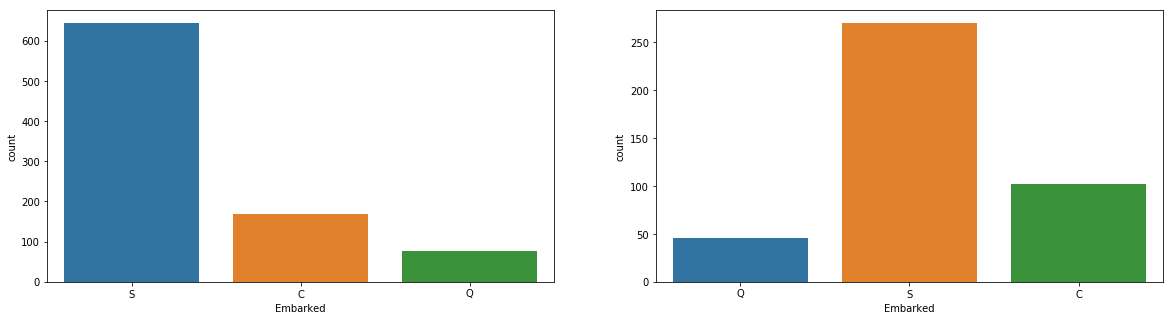

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot('Embarked', data=train_data)
plt.subplot(122)
sns.countplot('Embarked', data=test_data)

In [20]:
titanic_df['Survived'].mean()

0.3838383838383838

In [21]:
titanic_df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [22]:
class_sex_grouping = titanic_df.groupby(['Pclass','Sex']).mean()
class_sex_grouping

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

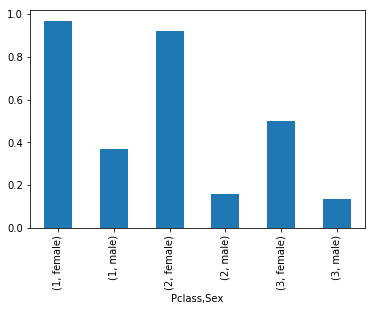

In [23]:
class_sex_grouping['Survived'].plot.bar()
# type(class_sex_grouping['Survived'])

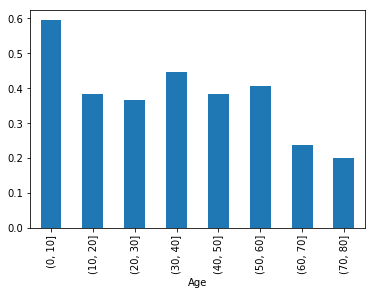

In [24]:
group_by_age = pd.cut(titanic_df["Age"], np.arange(0, 90, 10))
age_grouping = titanic_df.groupby(group_by_age).mean()
age_grouping
age_grouping['Survived'].plot.bar()

In [57]:
#NaN values in Age parameter are replaced with mean age and Nan value in Emarked are replaced with most common S
Values = {'Age':train_data['Age'].mean(), 'Embarked':"S"}
train_data.fillna(value=Values, inplace=True)
Values_test = {'Age':test_data['Age'].mean(), 'Fare':test_data['Fare'].mean()}
test_data.fillna(value=Values_test, inplace=True)
#train_data.info()

In [58]:
#convert Sex and Embarked from string to object
NewData_train=pd.get_dummies(train_data, prefix=['Sex', 'Embarked'])
NewData_test=pd.get_dummies(test_data, prefix=['Sex', 'Embarked'])
#NewData_train.info()

In [44]:
NewData_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
5,0,3,29.699118,0,0,8.4583,0,1,0,1,0
6,0,1,54.000000,0,0,51.8625,0,1,0,0,1
7,0,3,2.000000,3,1,21.0750,0,1,0,0,1
8,1,3,27.000000,0,2,11.1333,1,0,0,0,1
9,1,2,14.000000,1,0,30.0708,1,0,1,0,0


In [45]:
#Here "survival" is taken as output y ，X_train will be all other features
y_train = NewData_train["Survived"]
X_train = NewData_train.drop('Survived', axis=1)

In [51]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [50]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [49]:
#All the feature column are scaled using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler_train = scaler.fit_transform(X_train)
X_scaler_train = pd.DataFrame(X_scaler_train)
X_scaler_test = scaler.fit_transform(NewData_test)
X_scaler_test = pd.DataFrame(X_scaler_test)

C:\Users\Angela_Shi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Angela_Shi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Angela_Shi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Angela_Shi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **f

In [147]:
#use LogisticRegression modal
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_scaler_train, y_train)
y_pred_test = classifier.predict(X_scaler_test)
# print(classifier)
y_pred_test

C:\Users\Angela_Shi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [148]:
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.head()

,0
0,0
1,0
2,0
3,0
4,1


In [149]:
y_pred_test.rename(columns = {0:'Survived'},inplace=True)
y_pred_test

,Survived
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [150]:
y_pred_test['PassengerId'] = test_data['PassengerId']
y_pred_test.head()

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,1,896


In [151]:
psd = y_pred_test.PassengerId
y_pred_test.drop(labels=['PassengerId'], axis=1,inplace = True)
y_pred_test.insert(0, 'PassengerId', psd)
y_pred_test.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [152]:
y_pred_test.to_csv('LogisticTestResult.csv',header=True,index=False)

In [136]:
# from sklearn.metrics import confusion_matrix, classification_report
# cm = confusion_matrix(y_pred_train,y_train)
# sns.heatmap(cm, annot=True)
# print(classification_report(y_pred_train,y_train))

In [ ]:
# Model using Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_scaler_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [62]:
y_pred_train = regressor.predict(X_scaler_train)  
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.rename(columns={0:'col1'}, inplace=True)
y_pred_train.loc[y_pred_train['col1'] < 0.5, 'col1'] = 0
y_pred_train.loc[y_pred_train['col1'] >= 0.5, 'col1'] = 1

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       557
         1.0       0.96      0.98      0.97       334

   micro avg       0.98      0.98      0.98       891
   macro avg       0.97      0.98      0.97       891
weighted avg       0.98      0.98      0.98       891



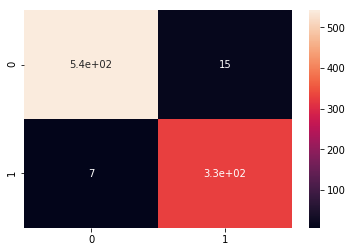

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_pred_train,y_train)
sns.heatmap(cm, annot=True)
print(classification_report(y_pred_train,y_train))

In [65]:
y_pred_train.head()

,col1
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [108]:
Y_pred_test = regressor.predict(X_scaler_test)
Y_pred_test = pd.DataFrame(Y_pred_test)
Y_pred_test.rename(columns = {0:'Survived'},inplace=True)
Y_pred_test.head()

,Survived
0,0.00
1,0.05
2,0.50
3,0.25
4,0.60


In [129]:
# Y_pred_test.loc[Y_pred_test['Survive'] < 0.5, 'Survival'] = 0
# Y_pred_test.loc[Y_pred_test['Survive'] >= 0.5, 'Survival'] = 1
# Y_pred_test.head()

Y_pred_test['PassengerId'] = test_data['PassengerId']

def judge_survive(value):
    if value < 0.5:
        return 0
    else:
        return 1

Y_pred_test['Survived'] = Y_pred_test['Survived'].apply(judge_survive)
Y_pred_test.head()


,Survived,PassengerId
0,0,892
1,0,893
2,1,894
3,0,895
4,1,896


In [130]:
psd = Y_pred_test.PassengerId
Y_pred_test.drop(labels=['PassengerId'], axis=1,inplace = True)
Y_pred_test.insert(0, 'PassengerId', psd)

In [131]:
Y_pred_test

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


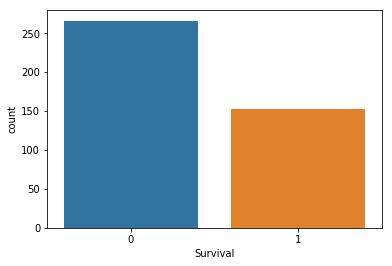

In [88]:
sns.countplot("Survival", data=Y_pred_test)

In [153]:
Y_pred_test.to_csv('RandomForestTestResult.csv',header=True,index=False)